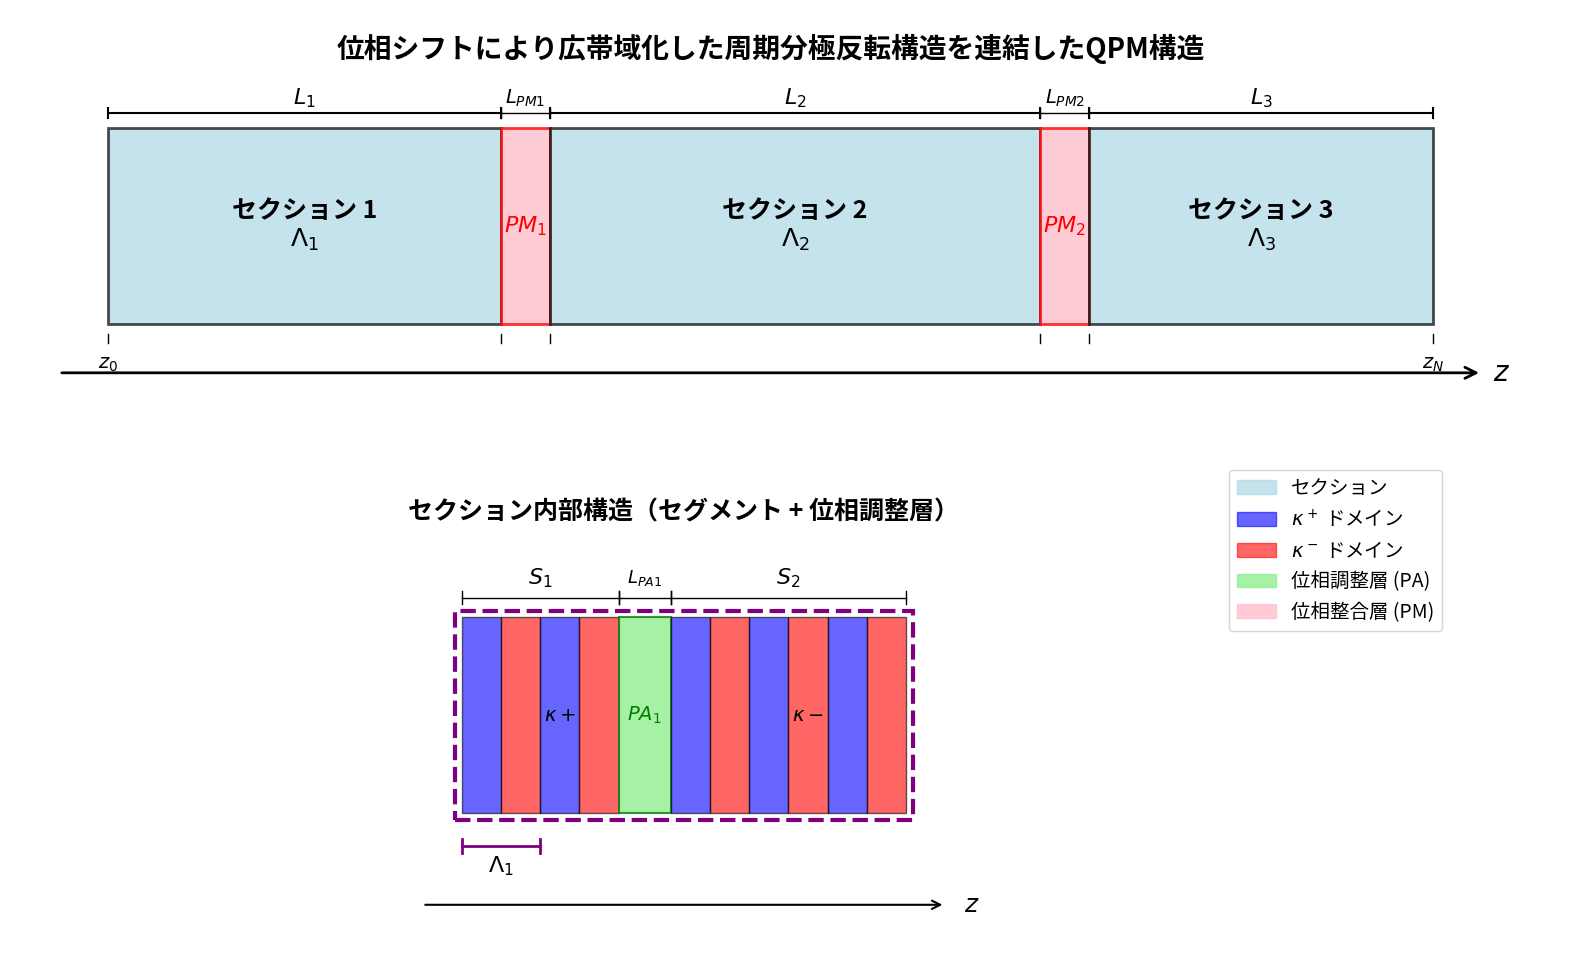

マトリョーシカ型QPM構造図を作成しました。


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyArrowPatch
import numpy as np


def create_matryoshka_qpm_structure():
    """
    マトリョーシカ型QPM構造の図を作成

    構造の階層:
    1. デバイス全体: 複数セクション + 位相整合層
    2. セクション: 特定周期の領域（複数セグメント + 位相調整層）
    3. セグメント: 一定周期（κ+/-ドメイン2つで1周期）
    4. ドメイン: κの正負
    """

    fig, (ax_overview, ax_detail) = plt.subplots(2, 1, figsize=(16, 10))

    # === 上部: 全体構造 ===
    create_overview_structure(ax_overview)

    # === 下部: セクション内部詳細 ===
    create_section_detail(ax_detail)

    plt.tight_layout()
    return fig


def create_overview_structure(ax):
    """全体構造（セクションレベル）の描画"""

    # セクション定義（全て同じ色に統一）
    sections = [
        {'name': 'セクション 1', 'period': r'$\Lambda_1$',
            'length': 4.0, 'color': 'lightblue'},
        {'name': 'セクション 2', 'period': r'$\Lambda_2$',
            'length': 5.0, 'color': 'lightblue'},
        {'name': 'セクション 3', 'period': r'$\Lambda_3$',
            'length': 3.5, 'color': 'lightblue'}
    ]

    # 位相整合層
    phase_matching_layer_width = 0.5
    y_base = 0
    height = 2.0
    x_current = 0

    for i, section in enumerate(sections):
        # セクション描画
        rect = patches.Rectangle((x_current, y_base), section['length'], height,
                                 linewidth=2, edgecolor='black',
                                 facecolor=section['color'], alpha=0.7)
        ax.add_patch(rect)

        # セクション名とパラメータ
        ax.text(x_current + section['length']/2, y_base + height/2,
                f"{section['name']}\n{section['period']}",
                ha='center', va='center', fontsize=18, weight='bold')

        # セクション長ラベル
        section_length_label = f"$L_{{{i+1}}}$"
        ax.text(x_current + section['length']/2, y_base + height + 0.3,
                section_length_label, ha='center', va='center', fontsize=16)

        # セクション長の線
        ax.plot([x_current, x_current + section['length']],
                [y_base + height + 0.15, y_base + height + 0.15], 'k-', linewidth=1.5)
        ax.plot([x_current, x_current],
                [y_base + height + 0.1, y_base + height + 0.2], 'k-', linewidth=1.5)
        ax.plot([x_current + section['length'], x_current + section['length']],
                [y_base + height + 0.1, y_base + height + 0.2], 'k-', linewidth=1.5)

        x_current += section['length']

        # 位相整合層（最後のセクション以外）
        if i < len(sections) - 1:
            pm_rect = patches.Rectangle((x_current, y_base), phase_matching_layer_width, height,
                                        linewidth=2, edgecolor='red',
                                        facecolor='pink', alpha=0.8)
            ax.add_patch(pm_rect)

            # 位相整合層ラベル
            ax.text(x_current + phase_matching_layer_width/2, y_base + height/2,
                    f'$PM_{{{i+1}}}$', ha='center', va='center',
                    fontsize=16, weight='bold', color='red')

            # 位相整合層の長さラベル
            ax.text(x_current + phase_matching_layer_width/2, y_base + height + 0.3,
                    f'$L_{{PM{i+1}}}$', ha='center', va='center', fontsize=14)

            # 位相整合層長の線
            ax.plot([x_current, x_current + phase_matching_layer_width],
                    [y_base + height + 0.15, y_base + height + 0.15], 'k-', linewidth=1)
            ax.plot([x_current, x_current],
                    [y_base + height + 0.1, y_base + height + 0.2], 'k-', linewidth=1)
            ax.plot([x_current + phase_matching_layer_width, x_current + phase_matching_layer_width],
                    [y_base + height + 0.1, y_base + height + 0.2], 'k-', linewidth=1)

            x_current += phase_matching_layer_width

    # z軸の矢印と位置ラベル
    arrow = FancyArrowPatch((-0.5, y_base - 0.5), (x_current + 0.5, y_base - 0.5),
                            arrowstyle='->', mutation_scale=20, linewidth=2)
    ax.add_patch(arrow)
    ax.text(x_current + 0.7, y_base - 0.5, '$z$', ha='center', va='center',
            fontsize=20, weight='bold')

    # 位置マーカー
    z_positions = [0]
    x_pos = 0
    for i, section in enumerate(sections):
        x_pos += section['length']
        z_positions.append(x_pos)
        if i < len(sections) - 1:
            x_pos += phase_matching_layer_width
            z_positions.append(x_pos)

    for i, z_pos in enumerate(z_positions):
        ax.plot([z_pos, z_pos], [y_base - 0.1, y_base - 0.2], 'k-', linewidth=1)
        if i == 0:
            ax.text(z_pos, y_base - 0.4, '$z_0$',
                    ha='center', va='center', fontsize=14)
        elif i == len(z_positions) - 1:
            ax.text(z_pos, y_base - 0.4, '$z_N$',
                    ha='center', va='center', fontsize=14)

    # タイトル
    ax.text(x_current/2, y_base + height + 0.8,
            '位相シフトにより広帯域化した周期分極反転構造を連結したQPM構造',
            ha='center', va='center', fontsize=20, weight='bold')

    # 軸設定
    ax.set_xlim(-1, x_current + 1.5)
    ax.set_ylim(y_base - 1, y_base + height + 1.2)
    ax.set_aspect('equal')
    ax.axis('off')


def create_section_detail(ax):
    """セクション内部構造（セグメントレベル）の詳細"""

    # セクション1の内部構造例
    y_base = 0
    height = 1.5
    x_start = 0

    # セグメント構造定義（例：2セグメント + 1位相調整層）
    segments = [
        {'num_domains': 4, 'color_pos': 'blue', 'color_neg': 'red'},  # セグメント1
        {'num_domains': 6, 'color_pos': 'blue', 'color_neg': 'red'}   # セグメント2
    ]

    domain_width = 0.3
    phase_adj_width = 0.4  # 位相調整層の幅
    x_current = x_start

    # セクション境界
    section_start = x_current

    for seg_idx, segment in enumerate(segments):
        # セグメント開始位置
        segment_start = x_current

        # ドメイン描画
        for domain_idx in range(segment['num_domains']):
            # κの正負を交互に
            if domain_idx % 2 == 0:
                color = segment['color_pos']
                kappa_sign = '+'
            else:
                color = segment['color_neg']
                kappa_sign = '-'

            # ドメイン描画
            rect = patches.Rectangle((x_current, y_base), domain_width, height,
                                     linewidth=1, edgecolor='black',
                                     facecolor=color, alpha=0.6)
            ax.add_patch(rect)

            # κラベル（中央のドメインのみ）
            if domain_idx == segment['num_domains'] // 2:
                ax.text(x_current + domain_width/2, y_base + height/2,
                        f'$\\kappa{kappa_sign}$', ha='center', va='center',
                        fontsize=14, weight='bold')

            x_current += domain_width

        # セグメント長ラベル
        segment_length = segment['num_domains'] * domain_width
        ax.text(segment_start + segment_length/2, y_base + height + 0.3,
                f'$S_{{{seg_idx+1}}}$', ha='center', va='center', fontsize=16)

        # セグメント長の線
        ax.plot([segment_start, segment_start + segment_length],
                [y_base + height + 0.15, y_base + height + 0.15], 'k-', linewidth=1)
        ax.plot([segment_start, segment_start],
                [y_base + height + 0.1, y_base + height + 0.2], 'k-', linewidth=1)
        ax.plot([segment_start + segment_length, segment_start + segment_length],
                [y_base + height + 0.1, y_base + height + 0.2], 'k-', linewidth=1)

        # 位相調整層（最後のセグメント以外）
        if seg_idx < len(segments) - 1:
            pa_rect = patches.Rectangle((x_current, y_base), phase_adj_width, height,
                                        linewidth=1.5, edgecolor='green',
                                        facecolor='lightgreen', alpha=0.8)
            ax.add_patch(pa_rect)

            # 位相調整層ラベル
            ax.text(x_current + phase_adj_width/2, y_base + height/2,
                    f'$PA_{{{seg_idx+1}}}$', ha='center', va='center',
                    fontsize=14, weight='bold', color='green')

            # 位相調整層の長さラベル
            ax.text(x_current + phase_adj_width/2, y_base + height + 0.3,
                    f'$L_{{PA{seg_idx+1}}}$', ha='center', va='center', fontsize=13)

            # 位相調整層長の線
            ax.plot([x_current, x_current + phase_adj_width],
                    [y_base + height + 0.15, y_base + height + 0.15], 'k-', linewidth=1)
            ax.plot([x_current, x_current],
                    [y_base + height + 0.1, y_base + height + 0.2], 'k-', linewidth=1)
            ax.plot([x_current + phase_adj_width, x_current + phase_adj_width],
                    [y_base + height + 0.1, y_base + height + 0.2], 'k-', linewidth=1)

            x_current += phase_adj_width

    # セクション全体の境界
    section_end = x_current
    section_rect = patches.Rectangle((section_start - 0.05, y_base - 0.05),
                                     section_end - section_start + 0.1, height + 0.1,
                                     linewidth=3, edgecolor='purple',
                                     facecolor='none', linestyle='--')
    ax.add_patch(section_rect)

    # 周期Λの表示
    # 1周期 = 2ドメイン
    period_length = 2 * domain_width
    ax.text(section_start + period_length/2, y_base - 0.4,
            '$\\Lambda_1$', ha='center', va='center', fontsize=16, weight='bold')

    # 周期の線
    ax.plot([section_start, section_start + period_length],
            [y_base - 0.25, y_base - 0.25], 'purple', linewidth=2)
    ax.plot([section_start, section_start],
            [y_base - 0.2, y_base - 0.3], 'purple', linewidth=2)
    ax.plot([section_start + period_length, section_start + period_length],
            [y_base - 0.2, y_base - 0.3], 'purple', linewidth=2)

    # z軸矢印
    arrow = FancyArrowPatch((section_start - 0.3, y_base - 0.7),
                            (section_end + 0.3, y_base - 0.7),
                            arrowstyle='->', mutation_scale=15, linewidth=1.5)
    ax.add_patch(arrow)
    ax.text(section_end + 0.5, y_base - 0.7, '$z$', ha='center', va='center',
            fontsize=18, weight='bold')

    # タイトル
    ax.text((section_start + section_end)/2, y_base + height + 0.8,
            'セクション内部構造（セグメント + 位相調整層）',
            ha='center', va='center', fontsize=18, weight='bold')

    # 凡例（右にずらして配置）
    legend_elements = [
        patches.Patch(color='lightblue', alpha=0.7, label='セクション'),
        patches.Patch(color='blue', alpha=0.6, label='$\\kappa^+$ ドメイン'),
        patches.Patch(color='red', alpha=0.6, label='$\\kappa^-$ ドメイン'),
        patches.Patch(color='lightgreen', alpha=0.8, label='位相調整層 (PA)'),
        patches.Patch(color='pink', alpha=0.8, label='位相整合層 (PM)')
    ]
    ax.legend(handles=legend_elements, loc='upper right',
              bbox_to_anchor=(1.25, 1), fontsize=14)

    # 軸設定（凡例のスペースを確保）
    ax.set_xlim(section_start - 0.8, section_end + 2.5)
    ax.set_ylim(y_base - 1, y_base + height + 1.2)
    ax.set_aspect('equal')
    ax.axis('off')


if __name__ == "__main__":
    fig = create_matryoshka_qpm_structure()
    plt.show()

    # 図を保存
    print("マトリョーシカ型QPM構造図を作成しました。")

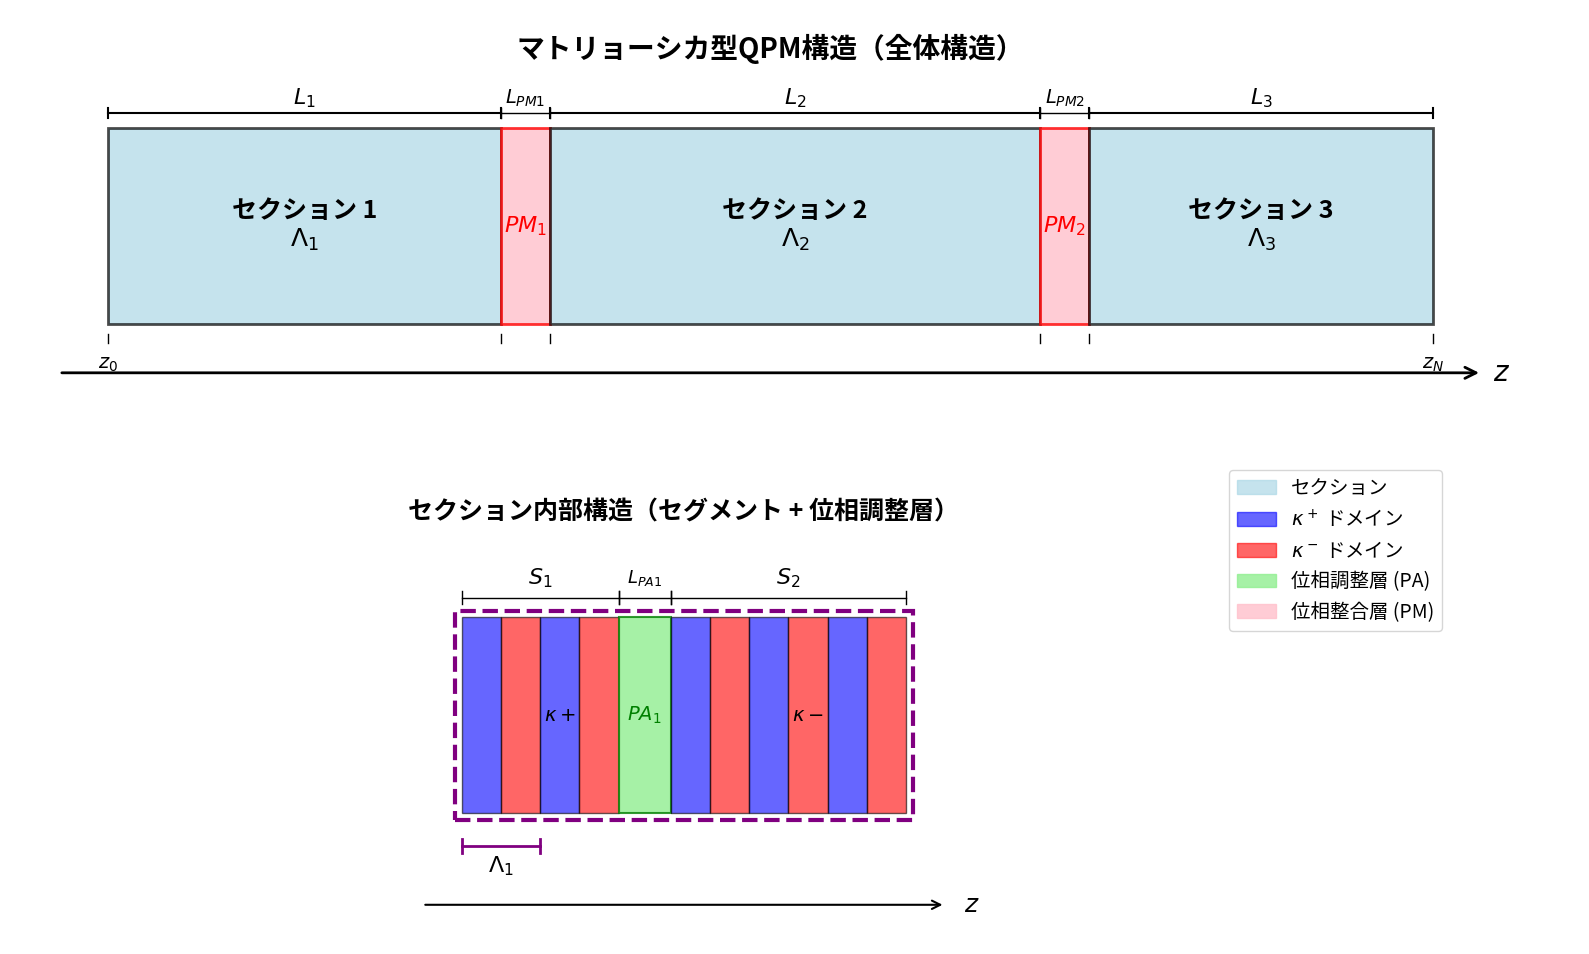

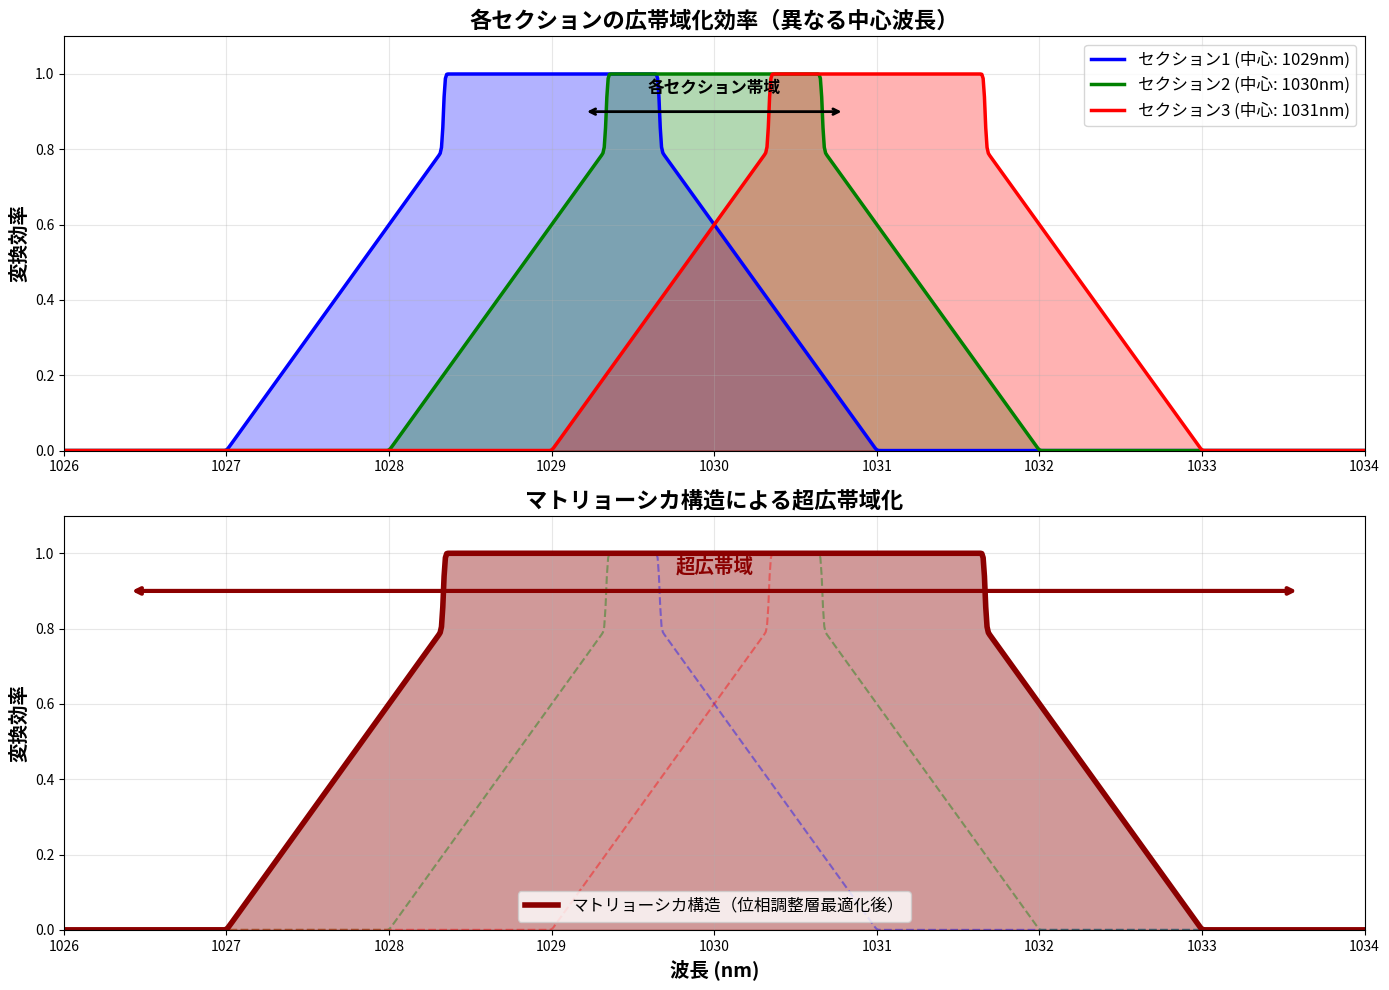

マトリョーシカ型QPM構造図と広帯域化メカニズム図を作成しました。


In [ ]:
# === 波長設定パラメータ ===
WAVELENGTH_CONFIG = {
    'start': 1026,      # 開始波長 (nm)
    'end': 1034,        # 終了波長 (nm)
    'points': 1000,     # データ点数
    'centers': [1029, 1030, 1031],  # 各セクションの中心波長 (nm)
    'colors': ['blue', 'green', 'red']  # 各セクションの色
}


def create_broadband_efficiency_visualization():
    """
    マトリョーシカ構造による広帯域化のメカニズムを示す図
    """
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    # 波長範囲の設定
    wavelength = np.linspace(WAVELENGTH_CONFIG['start'], WAVELENGTH_CONFIG['end'],
                             WAVELENGTH_CONFIG['points'])
    center_wavelengths = WAVELENGTH_CONFIG['centers']
    colors = WAVELENGTH_CONFIG['colors']

    # 波長範囲に基づいた適切な帯域幅を計算
    wl_range = WAVELENGTH_CONFIG['end'] - WAVELENGTH_CONFIG['start']
    # 帯域幅を全体の波長範囲の1/4程度に設定
    bandwidth = wl_range / 4

    # === 1. 各セクションの個別効率（広帯域化済み） ===
    ax1 = axes[0]

    section_efficiencies = []
    for i, (center_wl, color) in enumerate(zip(center_wavelengths, colors)):
        # 各セクションは既知の広帯域化手法により広帯域化されている
        efficiency = broadband_section_efficiency(
            wavelength, center_wl, bandwidth=bandwidth)
        section_efficiencies.append(efficiency)
        ax1.plot(wavelength, efficiency, color=color, linewidth=2.5,
                 label=f'セクション{i+1} (中心: {center_wl}nm)')
        ax1.fill_between(wavelength, 0, efficiency, alpha=0.3, color=color)

    ax1.set_ylabel('変換効率', fontsize=14, weight='bold')
    ax1.set_title('各セクションの広帯域化効率（異なる中心波長）', fontsize=16, weight='bold')
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 1.1)
    ax1.set_xlim(WAVELENGTH_CONFIG['start'], WAVELENGTH_CONFIG['end'])

    # === 2. 位相調整層による最適化後の合成（OR演算的） ===
    ax2 = axes[1]

    # 各波長において最大の効率を取る（OR演算的な合成）
    combined_optimized = np.maximum.reduce(section_efficiencies)

    # 個別のセクション効率も薄く表示
    for i, (efficiency, color) in enumerate(zip(section_efficiencies, colors)):
        ax2.plot(wavelength, efficiency, color=color, linewidth=1.5, alpha=0.4,
                 linestyle='--')

    ax2.plot(wavelength, combined_optimized, 'darkred', linewidth=4,
             label='マトリョーシカ構造（位相調整層最適化後）')
    ax2.fill_between(wavelength, 0, combined_optimized,
                     alpha=0.4, color='darkred')

    ax2.set_ylabel('変換効率', fontsize=14, weight='bold')
    ax2.set_xlabel('波長 (nm)', fontsize=14, weight='bold')
    ax2.set_title('マトリョーシカ構造による超広帯域化', fontsize=16, weight='bold')
    ax2.legend(fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 1.1)
    ax2.set_xlim(WAVELENGTH_CONFIG['start'], WAVELENGTH_CONFIG['end'])

    # 帯域幅の比較を矢印で示す（波長設定に基づいて自動調整）
    wl_center = (WAVELENGTH_CONFIG['start'] + WAVELENGTH_CONFIG['end']) / 2

    # 個別セクションの有効帯域を示す矢印
    section_bandwidth = bandwidth * 0.8  # 各セクションの実効帯域
    arrow1_start = wl_center - section_bandwidth / 2
    arrow1_end = wl_center + section_bandwidth / 2

    ax1.annotate('', xy=(arrow1_end, 0.9), xytext=(arrow1_start, 0.9),
                 arrowprops=dict(arrowstyle='<->', lw=2, color='black'))
    ax1.text(wl_center, 0.95, '各セクション帯域',
             ha='center', fontsize=12, weight='bold')

    # 合成後の超広帯域を示す矢印
    arrow2_start = WAVELENGTH_CONFIG['start'] + wl_range * 0.05
    arrow2_end = WAVELENGTH_CONFIG['end'] - wl_range * 0.05

    ax2.annotate('', xy=(arrow2_end, 0.9), xytext=(arrow2_start, 0.9),
                 arrowprops=dict(arrowstyle='<->', lw=3, color='darkred'))
    ax2.text((arrow2_start + arrow2_end) / 2, 0.95, '超広帯域',
             ha='center', fontsize=14, weight='bold', color='darkred')

    plt.tight_layout()
    return fig


def broadband_section_efficiency(wavelength, center_wl, bandwidth=2):
    """
    広帯域化されたセクションの効率関数
    （既知の手法により台形状に近い形状）
    """
    delta_wl = wavelength - center_wl

    # 台形状の関数を作成
    efficiency = np.zeros_like(wavelength)

    # 中心部分（高効率領域）
    flat_region = np.abs(delta_wl) <= bandwidth/3
    efficiency[flat_region] = 1.0

    # 傾斜部分
    slope_region = (np.abs(delta_wl) > bandwidth /
                    3) & (np.abs(delta_wl) <= bandwidth)
    slope_factor = 1 - \
        (np.abs(delta_wl[slope_region]) - bandwidth/3) / \
        (bandwidth - bandwidth/3)
    efficiency[slope_region] = slope_factor * 0.8

    # 滑らかにするためのガウシアンフィルタ
    efficiency = gaussian_smooth(efficiency, sigma=1)

    return efficiency


def gaussian_smooth(data, sigma=1):
    """ガウシアンフィルタによる平滑化"""
    from scipy import ndimage
    return ndimage.gaussian_filter1d(data, sigma=sigma)


# 可視化の実行
if __name__ == "__main__":
    # 構造図
    fig1 = create_matryoshka_qpm_structure()

    # 広帯域化メカニズム
    fig2 = create_broadband_efficiency_visualization()

    plt.show()

    print("マトリョーシカ型QPM構造図と広帯域化メカニズム図を作成しました。")

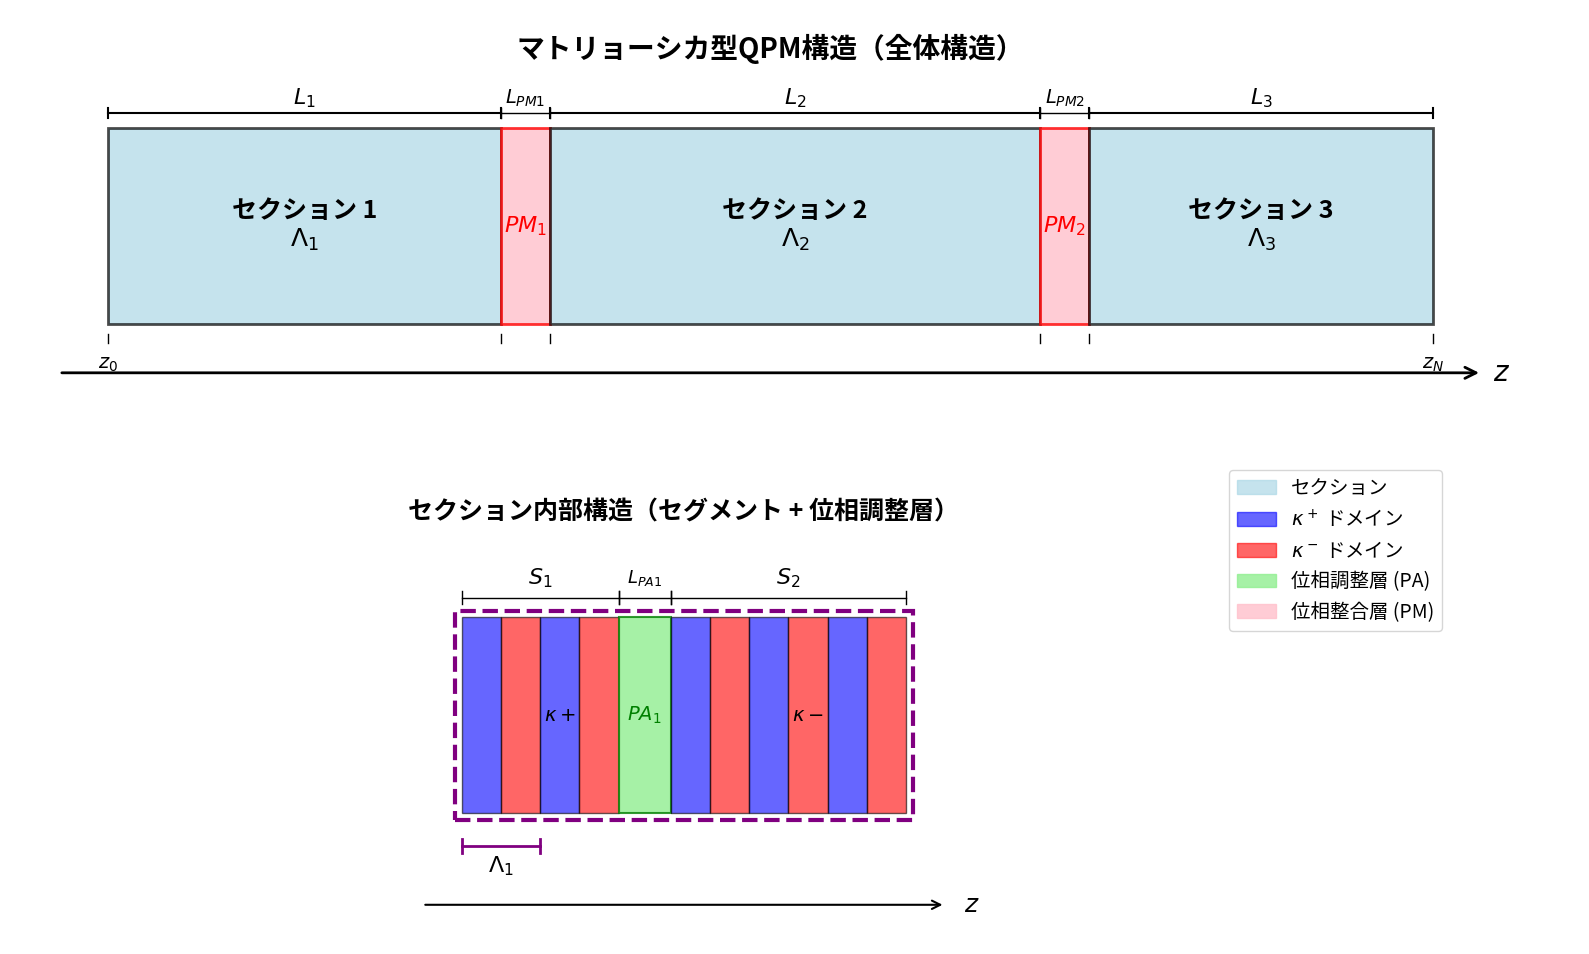

マトリョーシカ型QPM構造図を作成しました。
